# Exploratory Data Analysis

In [1]:
import os
import random
import re
from collections import Counter

# Define the data directory
data_dir = r"/content/drive/MyDrive/decompressed"

# Get a list of all files ending with '_datatxt'
files = [filename for filename in os.listdir(data_dir) if filename.endswith("_datatxt")]

# Check if there are any matching files
if not files:
    print("No files ending with '_datatxt' found in the directory.")
    exit()

# Select the first file
selected_file = files[0]
file_path = os.path.join(data_dir, selected_file)
print(f"Selected file for sampling: {selected_file}")

# Initialize a list to hold the documents
documents = []

# Read lines from the selected file
with open(file_path, 'r', encoding='utf-8', errors='replace') as f:
    for line in f:
        line = line.strip()
        if line:
            documents.append(line)

print(f"Total number of lines loaded from {selected_file}: {len(documents)}")

# Sampling
sample_size = min(10000, len(documents))
sampled_docs = random.sample(documents, sample_size)

# Count words
word_counter = Counter()
for doc in sampled_docs:
    tokens = re.findall(r'\w+', doc.lower())
    word_counter.update(tokens)

print("Most common words:", word_counter.most_common(20))

# Print a few random lines to inspect their quality
for line in random.sample(sampled_docs, 5):
    print("Sample line:", line)


Selected file for sampling: urlsf_subset03-228_datatxt
Total number of lines loaded from urlsf_subset03-228_datatxt: 8753
Most common words: [('the', 20263), ('to', 10129), ('of', 9481), ('and', 9356), ('a', 8692), ('in', 7062), ('that', 4651), ('s', 3904), ('is', 3885), ('it', 3559), ('for', 3326), ('on', 2862), ('i', 2811), ('with', 2670), ('was', 2344), ('as', 2342), ('he', 2147), ('this', 2113), ('be', 2085), ('you', 1950)]
Sample line: For those of you blissfully unfamiliar with the fetid mental trash littering the psyches of the mainstream Left, allow me to point out that the Left does not deny that Jihadists commit savage atrocities against innocent civilians, but the Left does not give a tinker’s damn about the innocent and these deaths, this maiming, this pain. That is because these deaths and this pain is real.
Sample line: 63. Seth Smith (35, OF, Orioles): A reliable corner outfielder, the left-handed hitting Smith was primarily used against right-handers in 2017. He batted 

Most common words: [('the', 20263), ('to', 10129), ('of', 9481), ('and', 9356), ('a', 8692), ('in', 7062), ('that', 4651), ('s', 3904), ('is', 3885), ('it', 3559), ('for', 3326), ('on', 2862), ('i', 2811), ('with', 2670), ('was', 2344), ('as', 2342), ('he', 2147), ('this', 2113), ('be', 2085), ('you', 1950)]


<ipython-input-4-ba2212c29b93>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


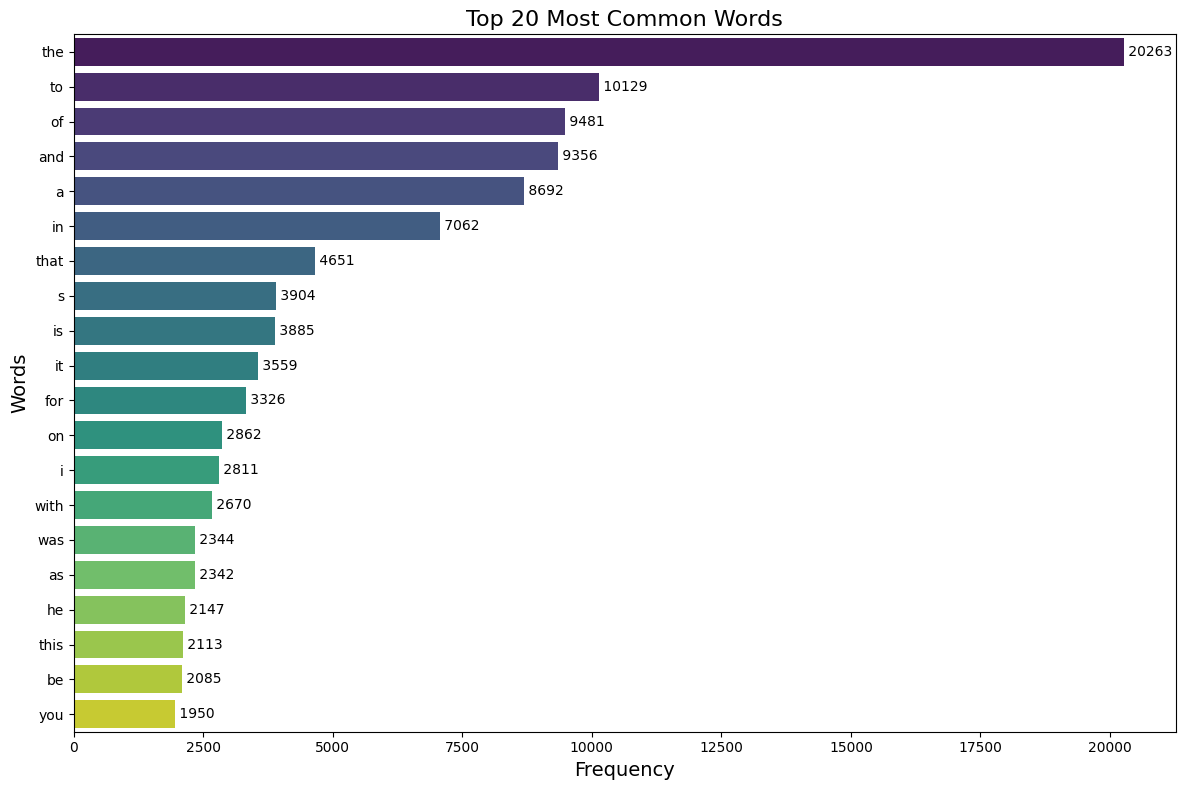


Sample Lines:
Sample line: “Only God Forgives”
Sample line: 4. Richard's Criteria: Legacy: Nope. Modern: Very fringe. Standard: Archetype staple.
Sample line: Meanwhile, the Trump administration is beginning at a time when fourth quarter 2016 GDP growth, despite predictions of a robust outcome, came in at a tepid 1.9 percent. If the economy over the next nine months weakens significantly, be assured replacing Obamacare with a new plan supported by 60 senators, including eight Democrats, will be even more difficult.
Sample line: “Unfortunately, the House Budget Resolution for FY 2013 breaks our bipartisan agreement and proposes $28 billion in new cuts in annual non-defense spending — exactly the area where we have already cut the most,” Zients writes.
Sample line: The beauty of a flower : Can a scientist really enjoy the beauty of a flower?


In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
ampled_docs = random.sample(documents, sample_size)

# Count words
word_counter = Counter()
for doc in sampled_docs:
    tokens = re.findall(r'\w+', doc.lower())
    word_counter.update(tokens)

print("Most common words:", word_counter.most_common(20))

# Plotting the most common words
def plot_most_common_words(word_counts, top_n=20):
    # Extract the top_n words and their counts
    most_common = word_counts.most_common(top_n)
    words, counts = zip(*most_common)

    # Create a horizontal bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")

    plt.title(f"Top {top_n} Most Common Words", fontsize=16)
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("Words", fontsize=14)

    # Optional: Add the count labels on the bars
    for index, value in enumerate(counts):
        plt.text(value, index, f' {value}', va='center')

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_most_common_words(word_counter, top_n=20)

# Print a few random lines to inspect their quality
print("\nSample Lines:")
for line in random.sample(sampled_docs, 5):
    print("Sample line:", line)


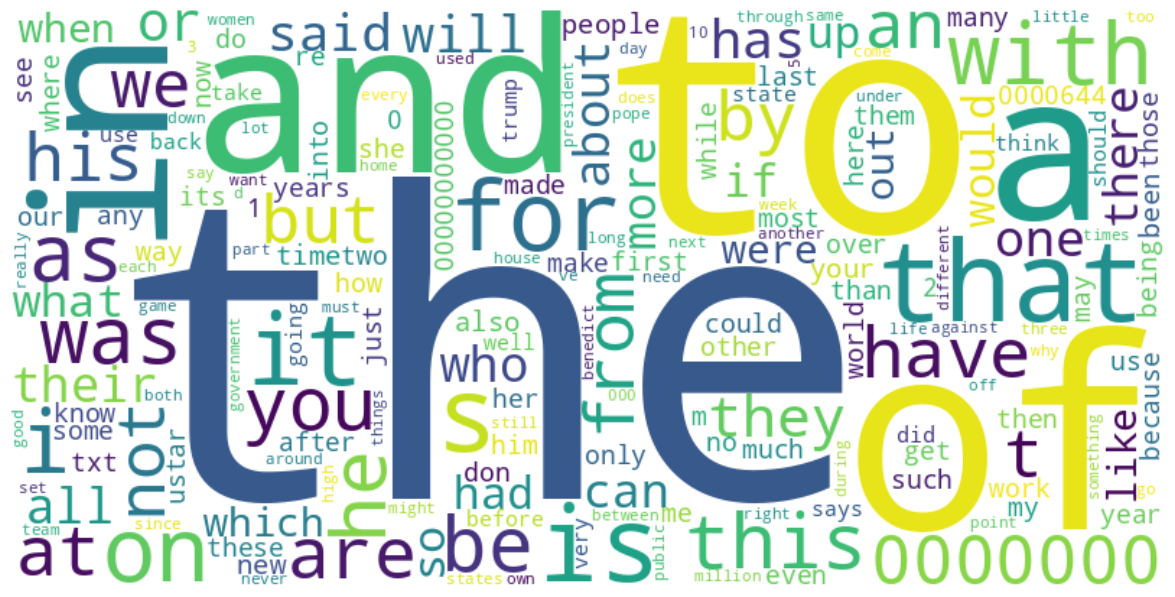

In [5]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


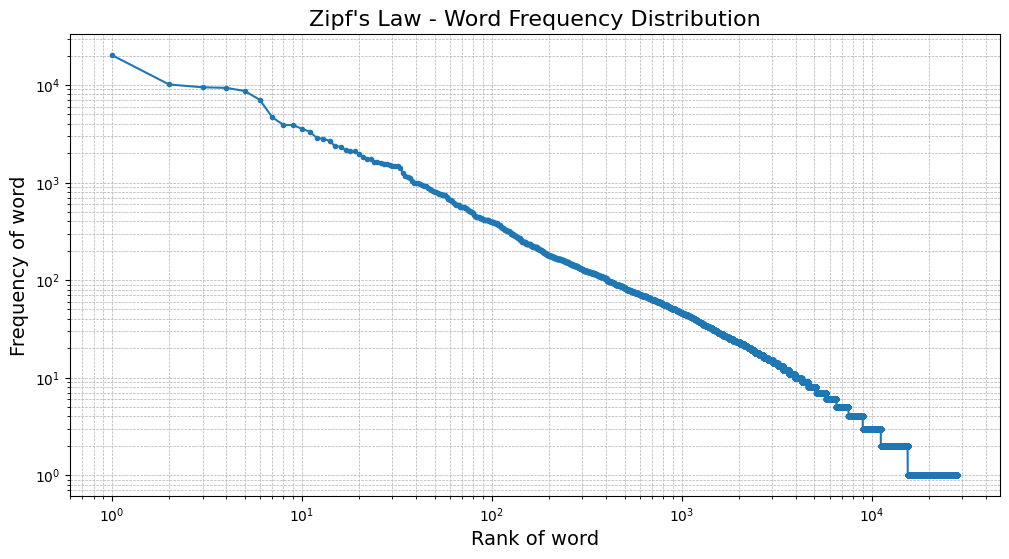

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get word counts sorted by frequency
sorted_counts = sorted(word_counter.values(), reverse=True)
ranks = range(1, len(sorted_counts) + 1)

# Plot Zipf's Law
plt.figure(figsize=(12, 6))
plt.loglog(ranks, sorted_counts, marker=".")
plt.title("Zipf's Law - Word Frequency Distribution", fontsize=16)
plt.xlabel("Rank of word", fontsize=14)
plt.ylabel("Frequency of word", fontsize=14)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


In [8]:
from collections import defaultdict

# Function to generate n-grams
def get_ngrams(text, n=2):
    tokens = re.findall(r'\w+', text.lower())
    return zip(*[tokens[i:] for i in range(n)])

# Count bigrams
bigram_counter = Counter()
for doc in sampled_docs:
    bigrams = get_ngrams(doc, n=2)
    bigram_counter.update(bigrams)

print("Most common bigrams:", bigram_counter.most_common(20))


Most common bigrams: [(('of', 'the'), 2232), (('in', 'the'), 1679), (('to', 'the'), 900), (('0000000', '0000000'), 818), (('on', 'the'), 747), (('it', 's'), 671), (('to', 'be'), 606), (('and', 'the'), 577), (('for', 'the'), 566), (('with', 'the'), 543), (('at', 'the'), 488), (('in', 'a'), 441), (('is', 'a'), 416), (('from', 'the'), 410), (('txt', '0000644'), 409), (('0000644', '0000000'), 409), (('0', 'ustar'), 409), (('ustar', '0000000'), 409), (('that', 'the'), 392), (('as', 'a'), 379)]


In [9]:
# Count trigrams
trigram_counter = Counter()
for doc in sampled_docs:
    trigrams = get_ngrams(doc, n=3)
    trigram_counter.update(trigrams)

print("Most common trigrams:", trigram_counter.most_common(20))


Most common trigrams: [(('txt', '0000644', '0000000'), 409), (('0000644', '0000000', '0000000'), 409), (('0', 'ustar', '0000000'), 409), (('ustar', '0000000', '0000000'), 409), (('one', 'of', 'the'), 185), (('i', 'don', 't'), 136), (('a', 'lot', 'of'), 133), (('the', 'united', 'states'), 92), (('it', 's', 'a'), 83), (('as', 'well', 'as'), 74), (('it', 's', 'not'), 69), (('some', 'of', 'the'), 67), (('the', 'u', 's'), 62), (('be', 'able', 'to'), 62), (('the', 'end', 'of'), 61), (('to', 'be', 'a'), 61), (('there', 'is', 'a'), 57), (('don', 't', 'know'), 55), (('i', 'm', 'not'), 55), (('according', 'to', 'the'), 55)]


<ipython-input-10-6d2493239efb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams), palette="magma")


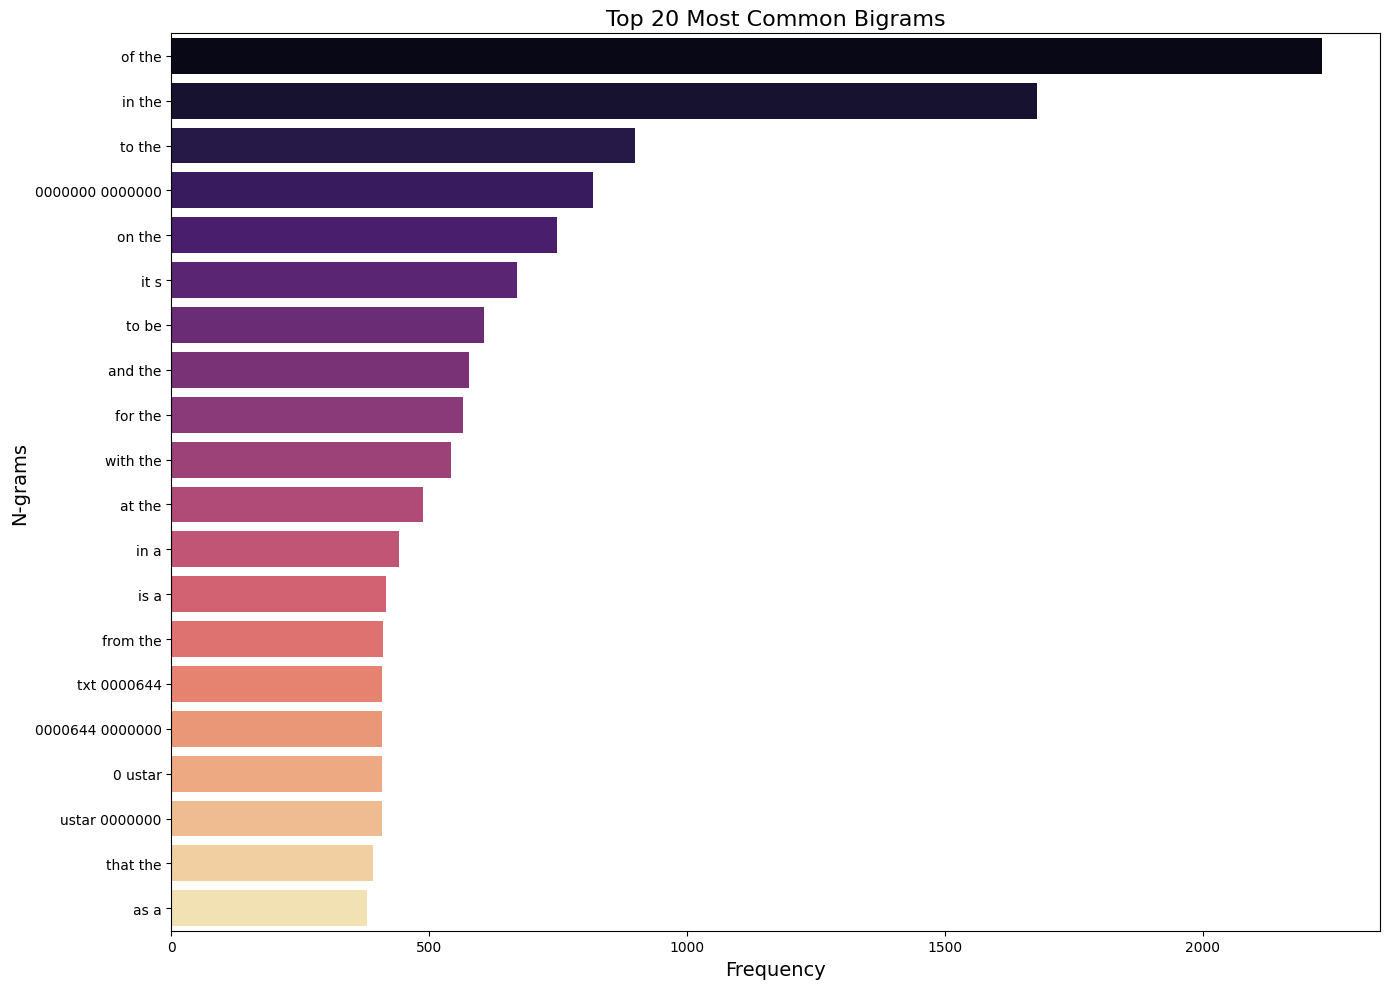

<ipython-input-10-6d2493239efb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams), palette="magma")


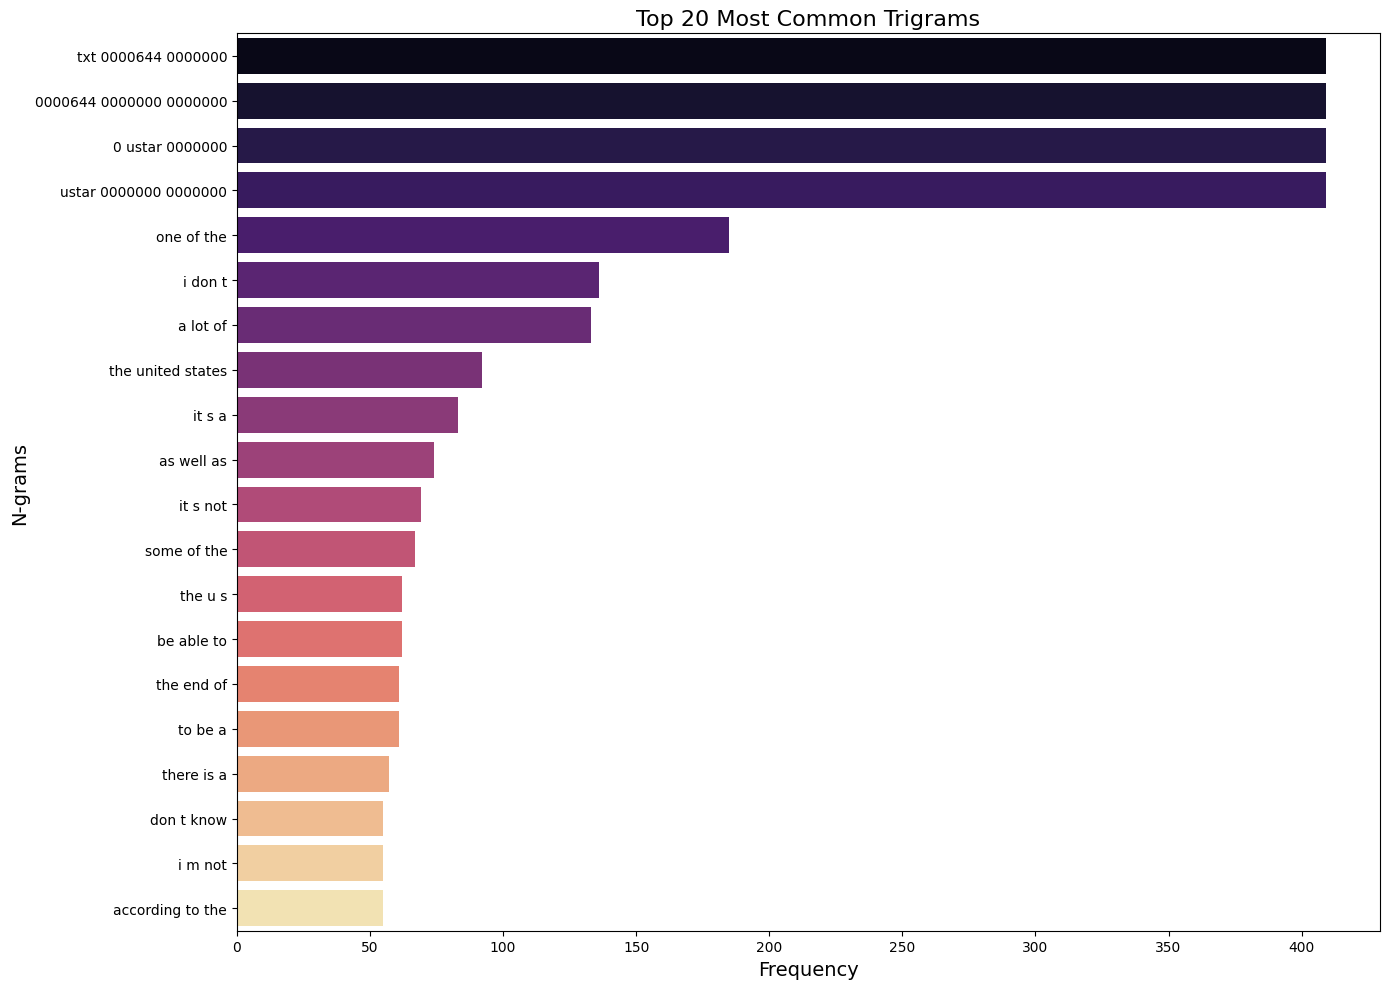

In [10]:
def plot_ngrams(ngram_counter, top_n=20, title='Most Common Bigrams'):
    most_common = ngram_counter.most_common(top_n)
    ngrams, counts = zip(*most_common)
    ngrams = [' '.join(ngram) for ngram in ngrams]

    plt.figure(figsize=(14, 10))
    sns.barplot(x=list(counts), y=list(ngrams), palette="magma")
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("N-grams", fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot top 20 bigrams
plot_ngrams(bigram_counter, top_n=20, title='Top 20 Most Common Bigrams')

# Plot top 20 trigrams
plot_ngrams(trigram_counter, top_n=20, title='Top 20 Most Common Trigrams')


Most common Named Entity Types: [('PERSON', 6814), ('ORG', 6641), ('DATE', 4593), ('GPE', 4063), ('CARDINAL', 3546), ('NORP', 2104), ('ORDINAL', 782), ('LOC', 546), ('MONEY', 455), ('WORK_OF_ART', 446), ('TIME', 376), ('FAC', 304), ('PERCENT', 234), ('PRODUCT', 221), ('QUANTITY', 185), ('EVENT', 180), ('LAW', 85), ('LANGUAGE', 47)]


<ipython-input-13-7e1600376d54>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(labels), palette="coolwarm")


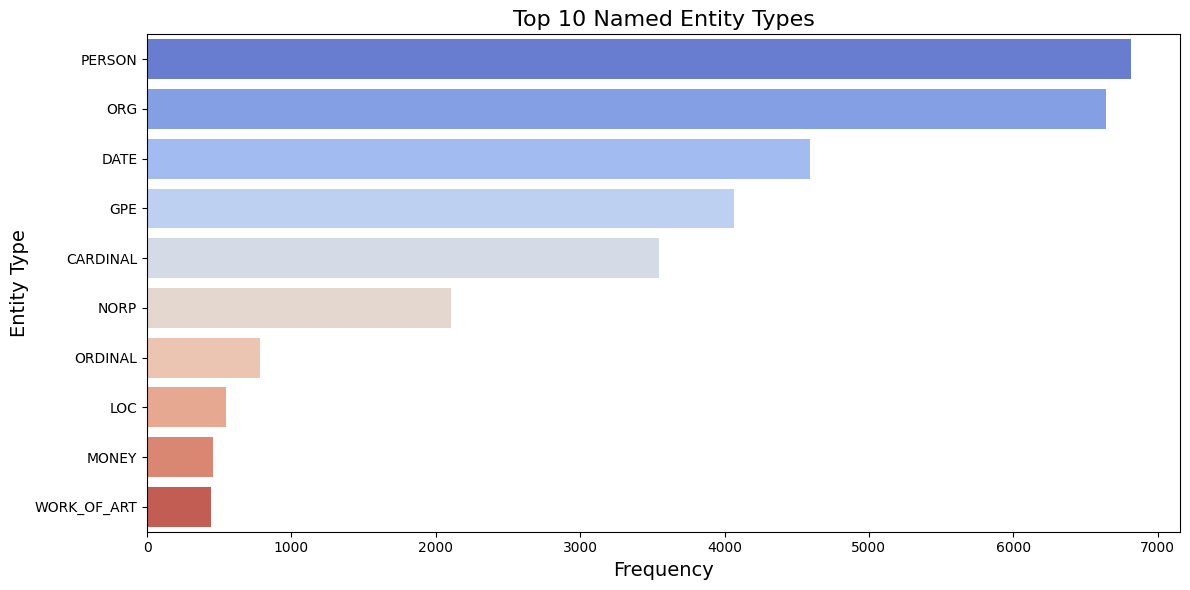

In [13]:
import spacy

# Load SpaCy's English model
nlp = spacy.load('en_core_web_sm')

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    return [ent.label_ for ent in doc.ents]

# Count entities
entity_counter = Counter()
for doc in sampled_docs:
    entities = extract_entities(doc)
    entity_counter.update(entities)

print("Most common Named Entity Types:", entity_counter.most_common())

# Visualize
labels, counts = zip(*entity_counter.most_common(10))
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(labels), palette="coolwarm")
plt.title("Top 10 Named Entity Types", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Entity Type", fontsize=14)
plt.tight_layout()
plt.show()


# Model Development

In [25]:
# Assuming 'sampled_docs' is available from previous steps
print(f"Number of sampled documents: {len(sampled_docs)}")

# Define stop words
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenize and clean text
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and token.text not in stop_words and len(token.text) > 2
    ]
    return tokens

# Apply preprocessing to all documents
processed_docs = [preprocess(doc) for doc in sampled_docs]

print(f"Sample preprocessed document: {processed_docs[0]}")


Number of sampled documents: 8753
Sample preprocessed document: ['pity', 'great', 'career', 'end', 'ignominious', 'departure', 'mercede', 'discover', 'paddy', 'lowe', 'hire', 'mclaren', 'replacement', 'behind', 'back']


In [28]:
# Create a Gensim dictionary
dictionary = corpora.Dictionary(processed_docs)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=5, no_above=0.5)

print(f"Number of unique tokens after filtering: {len(dictionary)}")

# Create the Bag-of-Words corpus
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print(f"Number of documents in corpus: {len(corpus)}")


Number of unique tokens after filtering: 5377
Number of documents in corpus: 8753


In [29]:
# Define the number of topics
NUM_TOPICS = 10

# Initialize and train the LDA model
lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=NUM_TOPICS,
    random_state=42,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Print the top 10 words for each topic
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx +1}: {topic}\n")


Topic 1: 0.019*"state" + 0.017*"include" + 0.016*"trump" + 0.014*"case" + 0.014*"government" + 0.013*"support" + 0.013*"accord" + 0.013*"say" + 0.011*"john" + 0.010*"plan"

Topic 2: 0.042*"like" + 0.039*"new" + 0.028*"go" + 0.020*"think" + 0.020*"thing" + 0.018*"look" + 0.015*"game" + 0.012*"really" + 0.012*"create" + 0.012*"book"

Topic 3: 0.048*"make" + 0.016*"may" + 0.016*"still" + 0.015*"call" + 0.015*"point" + 0.015*"tell" + 0.014*"might" + 0.012*"attack" + 0.012*"must" + 0.011*"love"

Topic 4: 0.039*"last" + 0.024*"follow" + 0.021*"since" + 0.021*"week" + 0.019*"close" + 0.018*"force" + 0.018*"though" + 0.017*"side" + 0.017*"system" + 0.016*"provide"

Topic 5: 0.030*"people" + 0.028*"take" + 0.020*"first" + 0.017*"want" + 0.016*"need" + 0.016*"give" + 0.016*"right" + 0.016*"know" + 0.015*"way" + 0.013*"muslim"

Topic 6: 0.080*"year" + 0.025*"million" + 0.019*"project" + 0.017*"deal" + 0.017*"sign" + 0.016*"already" + 0.014*"continue" + 0.013*"job" + 0.013*"market" + 0.012*"cause"

In [31]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.4f}')


Coherence Score: 0.3326


In [34]:
import pandas as pd

def get_dominant_topic(ldamodel, corpus, texts):
    """
    Assigns the dominant topic to each document based on the highest topic probability.
    """
    dominant_topics = []
    topic_percentages = []
    for i, row in enumerate(ldamodel.get_document_topics(corpus)):
        if row:
            # Sort the topics in descending order of probability
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            # Get the dominant topic and its percentage
            dominant_topic, topic_pct = row[0]
            dominant_topics.append(dominant_topic)
            topic_percentages.append(topic_pct)
        else:
            dominant_topics.append(None)
            topic_percentages.append(0)
    return dominant_topics, topic_percentages

# Create a DataFrame to hold documents and their cluster assignments
df_clusters = pd.DataFrame({
    'Document': sampled_docs,
    'Processed_Document': processed_docs,
    'Corpus': corpus
})

# Assign dominant topics
df_clusters['Dominant_Topic'], df_clusters['Topic_Percentage'] = get_dominant_topic(lda_model, corpus, sampled_docs)

print(df_clusters[['Document', 'Dominant_Topic', 'Topic_Percentage']].head())


                                            Document  Dominant_Topic  \
0  ‘It is a pity that such a great career should ...               7   
1  STEVENS: Yeah. Exactly. I'd like to do longer ...               4   
2                              go run youtube-gif-go               1   
3  A China-Mexico trade deal, however, may do lit...               5   
4             Oh, the brave Music of a distant Drum!               6   

   Topic_Percentage  
0          0.218189  
1          0.206279  
2          0.215495  
3          0.403651  
4          0.146629  


<ipython-input-35-50ac33456dc2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="Set3")


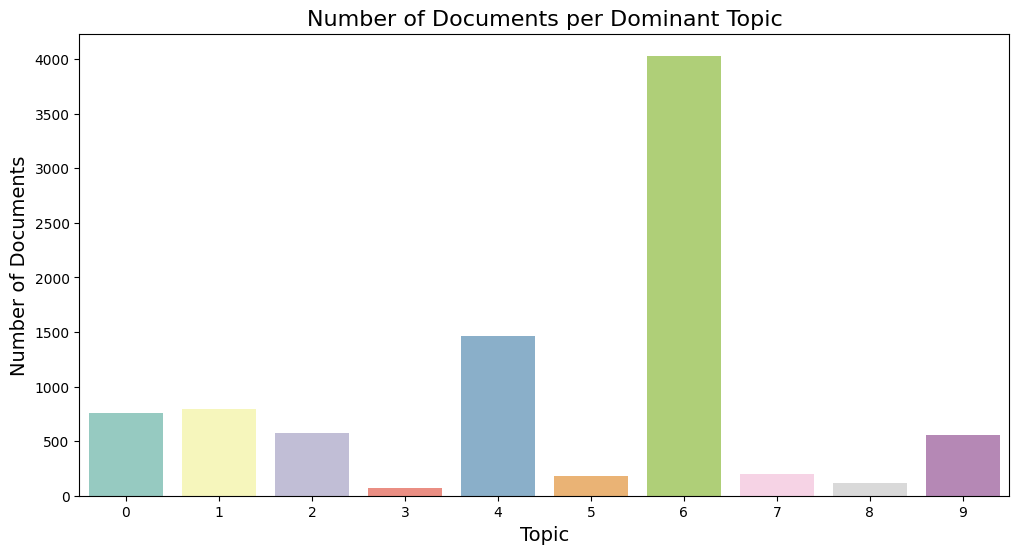

In [35]:
# Count the number of documents per dominant topic
topic_counts = df_clusters['Dominant_Topic'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="Set3")
plt.title('Number of Documents per Dominant Topic', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Number of Documents', fontsize=14)
plt.show()


# Results Summary


This project focused on exploring unsupervised learning techniquess to analyze a dataset of text documents, emphasizing exploratory data analysis (EDA), text preprocessing, and topic modeling using Latent Dirichlet Allocation (LDA). The consisted of 8700 random text files from the OpenWebText datase, and a random sample was used for deeper analysis. Initial exploration revealed the frequency of common words like "the," "to," and "of," indicating that the dataset included significant noise in the form of stop words. Visualizations of the top 20 most common words confirmed this observation, demonstrating the importance of preprocessing to filter out less meaningful terms. Additionally, named entity recognition (NER) provided insights into the dataset's content, identifying frequently mentioned entities such as "PERSON," "ORG," "DATE," and "GPE." These results highlighted the diversity of the dataset, with a mix of personal names, organizations, dates, and locations prominently featured.

Text preprocessing played a crucial role in cleaning the dataset. Lemmatization, tokenization, and removal of stop words effectively reduced noise and prepared the text for further analysis. The preprocessing steps also included creating a dictionary with unique tokens and filtering extremes to limit features, resulting in a final set of 5,377 tokens. This process was critical for generating a high-quality bag-of-words (BoW) corpus that accurately represented the content of the documents. However, the preprocessing step could be further improved by addressing rare words and domain-specific terminology that might contribute to meaningful patterns.

Topic modeling using LDA revealed ten distinct topics, each characterized by its most prominent keywords. For example, topics covered themes such as governance and cases, economy and projects, and global issues related to energy. Despite this success, the coherence score of the model was low, suggesting that the topics lacked clarity and overlap existed between them. A potential area of improvement would be optimizing hyperparameters, such as the number of topics, or using alternative coherence metrics to assess model performance. Additionally, experimenting with different preprocessing techniques, like stemming or incorporating bigram and trigram models, might improve topic differentiation.

Finally, the assignment of dominant topics to individual documents provided valuable insights into the dataset's structure. Each document was labeled with its most probable topic, and the distribution of documents across topics was visualized. While the clustering showed reasonable alignment with the dataset's content, some topics appeared overly broad or generic. This suggests that finer-grained adjustments, such as increasing the number of passes during training or employing hierarchical topic models, might yield more precise groupings.






